### Import things

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./CSVs/all_clean.csv')

### I'm going to drop the book Passenger to Frankfurt for now because the authors had identified it as an outlier and also dropped it for during their analysis for the following reasons:
>A linear regression on the decline in vocabulary with age approaches significance [F(1,14) =4
3.95, p = .066], and is highly significant when the outlier, Frankfurt, is removed (see discussion below) [F(1,13) = 9.80, p < .01]

>Outlier. Passenger to Frankfurt has the largest vocabulary of all the works we analyzed.
Unlike Christie’s other works, it is a thriller, not a detective mystery, conceived, written,
and researched in her early to mid 70s. Subtitled “An extravaganza”, it draws on books
by political thinkers that she requested of her publishers. On receiving her manuscript,
they were doubtful about bringing it out because it differed so much from her detective
fiction. Much of the vocabulary in Passenger to Frankfurt comes from her reliance on
these sources. We therefore exclude it as an outlier from our tests for vocabulary richness. Nonetheless, we observe that it was not an outlier with regard to indefinite words.

In [3]:
df = df[df['book_title'].str.lower() != 'passenger to frankfurt'].reset_index(drop=True)

In [4]:
df.corr()['year_written']

year_written              1.000000
sentence_count            0.115387
word_count                0.113981
syllable_count            0.059531
flesch_reading_ease       0.339555
avg_words_per_sentence   -0.058064
avg_syllables_per_word   -0.379514
unique_word_count        -0.301340
unique_words_%           -0.428080
total_adj_count           0.215862
unique_adj_count         -0.237416
total_noun_count         -0.062076
unique_noun_count        -0.063343
thing                     0.186686
%_thing                   0.170474
something                 0.548332
%_something               0.581562
anything                  0.605357
%_anything                0.588270
stuff                     0.251288
%_stuff                   0.226321
lot                       0.662378
%_lot                     0.677811
very                      0.528904
%_very                    0.575552
repeated_trigrams         0.217078
total_pos_sentences       0.113856
total_neu_sentences       0.068656
total_neg_sentences 

### Replicating the Lancashire & Hirst, 2009 paper

The authors found that the "richness" Christie's novels declined, repeated phrase types as measured by n-grams increased, and usage of indefinite words increased as she aged.

Text(0.5, 1.0, 'Unique Word Count Over the Years')

<Figure size 720x504 with 0 Axes>

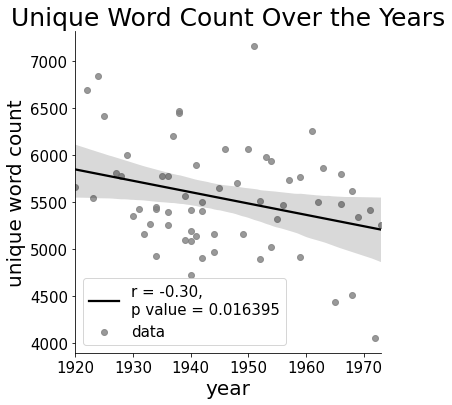

In [5]:
plt.figure(figsize=[10,7])
r = pearsonr(df['year_written'], df["unique_word_count"])[0]
p_value = pearsonr(df['year_written'], df["unique_word_count"])[1]
sns.lmplot(x="year_written", y="unique_word_count", data=df,scatter_kws={"color": "gray"}, line_kws={"color": "black"});
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('year', size = 20)
plt.ylabel('unique word count', size = 20)
plt.legend((f'r = {r:.2f}, \np value = {p_value:.6f}', 'data'), prop={'size': 15})
plt.title('Unique Word Count Over the Years', size = 25)

Text(0.5, 1.0, "Frequency of the word 'Something' in Text Over the Years")

<Figure size 720x504 with 0 Axes>

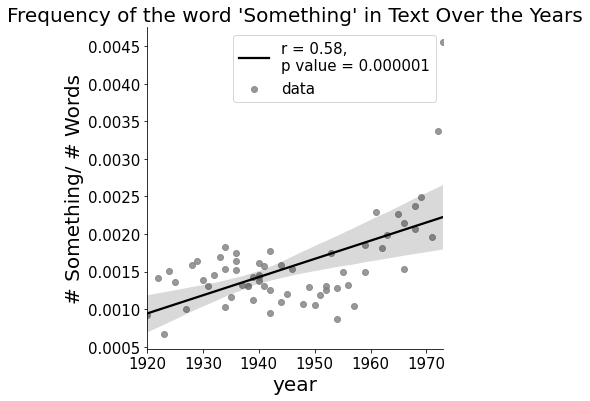

In [6]:
plt.figure(figsize=[10,7])
r = pearsonr(df['year_written'], df["%_something"])[0]
p_value = pearsonr(df['year_written'], df["%_something"])[1]
sns.lmplot(x="year_written", y="%_something", data=df, scatter_kws={"color": "gray"}, line_kws={"color": "black"});
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('year', size = 20)
plt.ylabel('# Something/ # Words', size = 20)
plt.legend((f'r = {r:.2f}, \np value = {p_value:.6f}', 'data'), prop={'size': 15})
plt.title('Frequency of the word \'Something\' in Text Over the Years', size = 20)

Text(0.5, 1.0, "Frequency of the word 'Anything' Over the Years")

<Figure size 720x504 with 0 Axes>

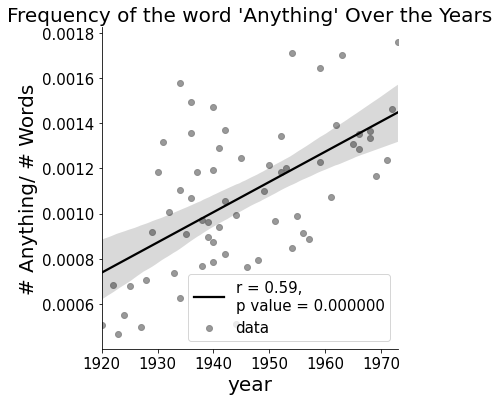

In [7]:
plt.figure(figsize=[10,7])
r = pearsonr(df['year_written'], df["%_anything"])[0]
p_value = pearsonr(df['year_written'], df["%_anything"])[1]
sns.lmplot(x="year_written", y="%_anything", data=df, scatter_kws={"color": "gray"}, line_kws={"color": "black"});
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('year', size = 20)
plt.ylabel('# Anything/ # Words', size = 20)
plt.legend((f'r = {r:.2f}, \np value = {p_value:.6f}', 'data'), prop={'size': 15})
plt.title('Frequency of the word \'Anything\' Over the Years', size = 20)

Text(0.5, 1.0, "Frequency of the word 'Thing' Over the Years")

<Figure size 720x504 with 0 Axes>

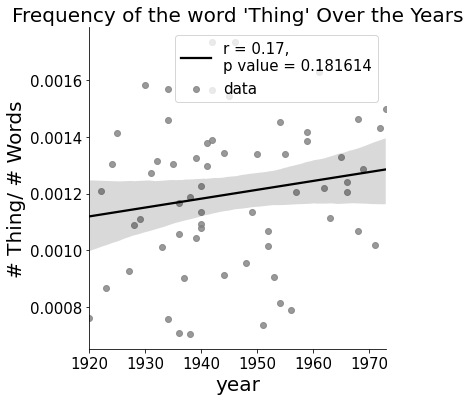

In [8]:
plt.figure(figsize=[10,7])
r = pearsonr(df['year_written'], df["%_thing"])[0]
p_value = pearsonr(df['year_written'], df["%_thing"])[1]
sns.lmplot(x="year_written", y="%_thing", data=df, scatter_kws={"color": "gray"}, line_kws={"color": "black"});
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('year', size = 20)
plt.ylabel('# Thing/ # Words', size = 20)
plt.legend((f'r = {r:.2f}, \np value = {p_value:.6f}', 'data'), prop={'size': 15})
plt.title('Frequency of the word \'Thing\' Over the Years', size = 20)

Text(0.5, 1.0, 'Frequency of Repeated Trigrams')

<Figure size 720x504 with 0 Axes>

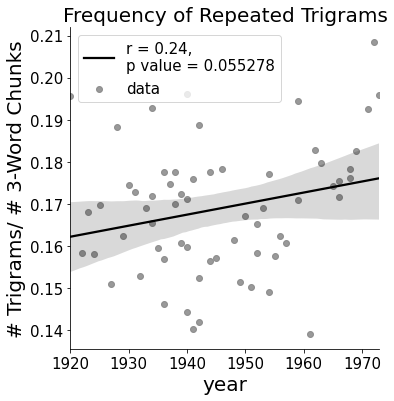

In [9]:
plt.figure(figsize=[10,7])
r = pearsonr(df['year_written'], df["%_repeated_trigrams"])[0]
p_value = pearsonr(df['year_written'], df["%_repeated_trigrams"])[1]
sns.lmplot(x="year_written", y="%_repeated_trigrams", data=df,  scatter_kws={"color": "gray"}, line_kws={"color": "black"});
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('year', size = 20)
plt.ylabel('# Trigrams/ # 3-Word Chunks', size = 20)
plt.legend((f'r = {r:.2f}, \np value = {p_value:.6f}', 'data'), prop={'size': 15})
plt.title('Frequency of Repeated Trigrams', size = 20)

### Further analysis of her text

Text(0.5, 1.0, '% Stopwords Over the Years')

<Figure size 720x504 with 0 Axes>

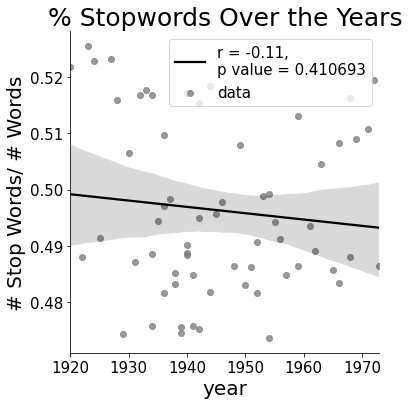

In [10]:
plt.figure(figsize=[10,7])
r = pearsonr(df['year_written'], df["%_stop_words"])[0]
p_value = pearsonr(df['year_written'], df["%_stop_words"])[1]
sns.lmplot(x="year_written", y="%_stop_words", data=df,scatter_kws={"color": "gray"}, line_kws={"color": "black"});
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('year', size = 20)
plt.ylabel('# Stop Words/ # Words', size = 20)
plt.legend((f'r = {r:.2f}, \np value = {p_value:.6f}', 'data'), prop={'size': 15})
plt.title('% Stopwords Over the Years', size = 25)

Text(0.5, 1.0, '% Stuff Over the Years')

<Figure size 720x504 with 0 Axes>

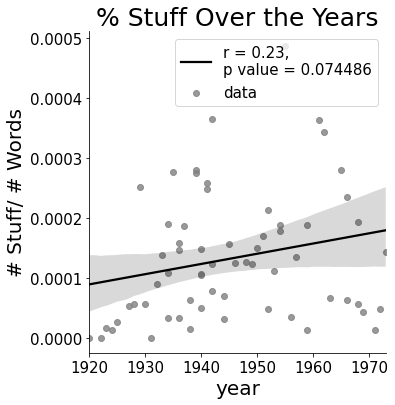

In [11]:
plt.figure(figsize=[10,7])
r = pearsonr(df['year_written'], df["%_stuff"])[0]
p_value = pearsonr(df['year_written'], df["%_stuff"])[1]
sns.lmplot(x="year_written", y="%_stuff", data=df,  scatter_kws={"color": "gray"}, line_kws={"color": "black"});
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('year', size = 20)
plt.ylabel('# Stuff/ # Words', size = 20)
plt.legend((f'r = {r:.2f}, \np value = {p_value:.6f}', 'data'), prop={'size': 15})
plt.title('% Stuff Over the Years', size = 25)

Text(0.5, 1.0, '% Very Over the Years')

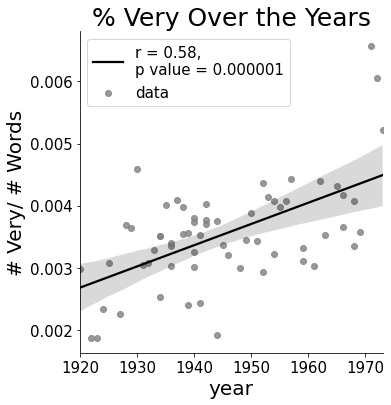

In [12]:
r = pearsonr(df['year_written'], df["%_very"])[0]
p_value = pearsonr(df['year_written'], df["%_very"])[1]
sns.lmplot(x="year_written", y="%_very", data=df, scatter_kws={"color": "gray"}, line_kws={"color": "black"});
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('year', size = 20)
plt.ylabel('# Very/ # Words', size = 20)
plt.legend((f'r = {r:.2f}, \np value = {p_value:.6f}', 'data'), prop={'size': 15})
plt.title('% Very Over the Years', size = 25)

Text(0.5, 1.0, '% Lot Over the Years')

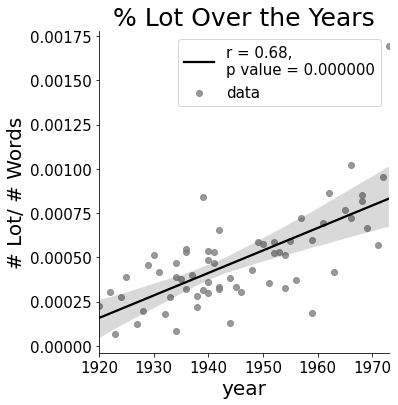

In [13]:
r = pearsonr(df['year_written'], df["%_lot"])[0]
p_value = pearsonr(df['year_written'], df["%_lot"])[1]
sns.lmplot(x="year_written", y="%_lot", data=df, scatter_kws={"color": "gray"}, line_kws={"color": "black"});
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('year', size = 20)
plt.ylabel('# Lot/ # Words', size = 20)
plt.legend((f'r = {r:.2f}, \np value = {p_value:.6f}', 'data'), prop={'size': 15})
plt.title('% Lot Over the Years', size = 25)

Text(0.5, 1.0, '% Unique Words Over the Years')

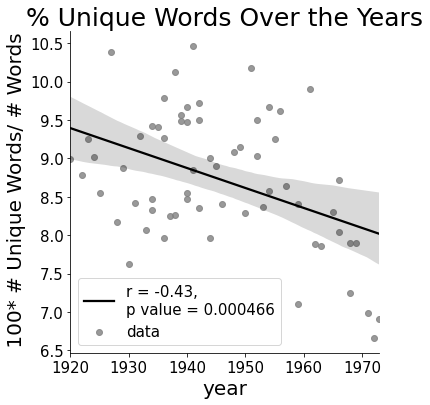

In [14]:
r = pearsonr(df['year_written'], df["unique_words_%"])[0]
p_value = pearsonr(df['year_written'], df["unique_words_%"])[1]
sns.lmplot(x="year_written", y="unique_words_%", data=df,scatter_kws={"color": "gray"}, line_kws={"color": "black"});
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('year', size = 20)
plt.ylabel(' 100* # Unique Words/ # Words', size = 20)
plt.legend((f'r = {r:.2f}, \np value = {p_value:.6f}', 'data'), prop={'size': 15})
plt.title('% Unique Words Over the Years', size = 25)

Text(0.5, 1.0, 'Sentence Count Over the Years')

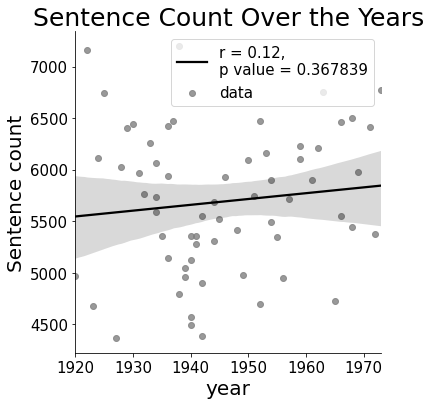

In [15]:
r = pearsonr(df['year_written'], df["sentence_count"])[0]
p_value = pearsonr(df['year_written'], df["sentence_count"])[1]
sns.lmplot(x="year_written", y="sentence_count", data=df,scatter_kws={"color": "gray"}, line_kws={"color": "black"});
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('year', size = 20)
plt.ylabel('Sentence count', size = 20)
plt.legend((f'r = {r:.2f}, \np value = {p_value:.6f}', 'data'), prop={'size': 15})
plt.title('Sentence Count Over the Years', size = 25)

Text(0.42499999999999716, 0.5, 'average words per sentence')

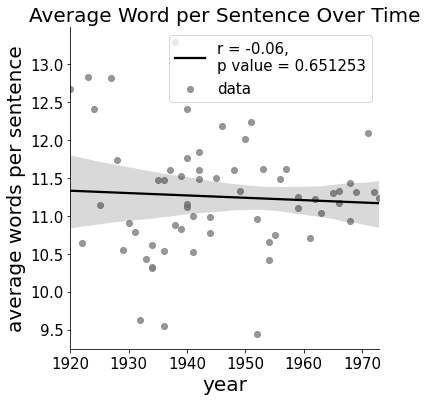

In [16]:
r = pearsonr(df['year_written'], df["avg_words_per_sentence"])[0]
p_value = pearsonr(df['year_written'], df["avg_words_per_sentence"])[1]
sns.lmplot(x="year_written", y="avg_words_per_sentence", data=df,scatter_kws={"color": "gray"}, line_kws={"color": "black"});
plt.xticks(size=15)
plt.yticks(size=15)
plt.legend((f'r = {r:.2f}, \np value = {p_value:.6f}', 'data'), prop={'size': 15})
plt.title('Average Word per Sentence Over Time', size=20)
plt.xlabel('year', size = 20)
plt.ylabel('average words per sentence', size = 20)

Text(0.5, 1.0, 'Flesch Reading Ease Score Over Time')

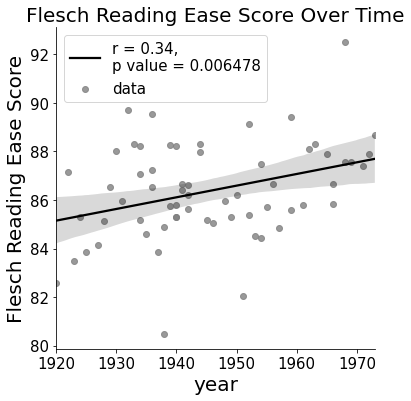

In [17]:
r = pearsonr(df['year_written'], df["flesch_reading_ease"])[0]
p_value = pearsonr(df['year_written'], df["flesch_reading_ease"])[1]
sns.lmplot(x="year_written", y="flesch_reading_ease", data=df,scatter_kws={"color": "gray"}, line_kws={"color": "black"});
plt.xticks(size=15)
plt.yticks(size=15)
plt.legend((f'r = {r:.2f}, \np value = {p_value:.6f}', 'data'), prop={'size': 15})
plt.xlabel('year', size = 20)
plt.ylabel('Flesch Reading Ease Score', size = 20)
plt.title('Flesch Reading Ease Score Over Time', size=20)

Text(-2.700000000000003, 0.5, 'Adjective Count')

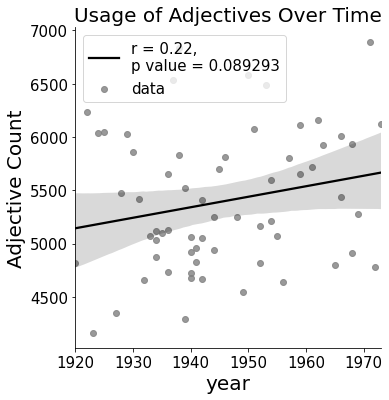

In [18]:
r = pearsonr(df['year_written'], df["total_adj_count"])[0]
p_value = pearsonr(df['year_written'], df["total_adj_count"])[1]
sns.lmplot(x="year_written", y="total_adj_count", data=df,scatter_kws={"color": "gray"}, line_kws={"color": "black"});
plt.xticks(size=15)
plt.yticks(size=15)
plt.legend((f'r = {r:.2f}, \np value = {p_value:.6f}', 'data'), prop={'size': 15})
plt.title('Usage of Adjectives Over Time', size=20)
plt.xlabel('year', size = 20)
plt.ylabel('Adjective Count', size = 20)

Text(-9.075000000000003, 0.5, 'Noun Count')

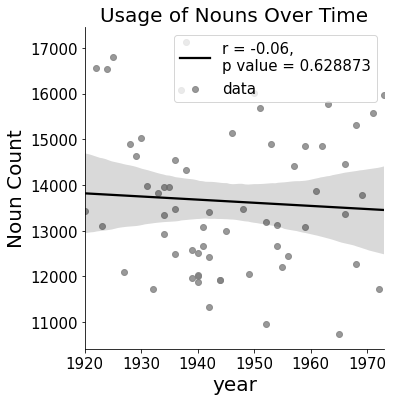

In [19]:
r = pearsonr(df['year_written'], df["total_noun_count"])[0]
p_value = pearsonr(df['year_written'], df["total_noun_count"])[1]
sns.lmplot(x="year_written", y="total_noun_count", data=df,scatter_kws={"color": "gray"}, line_kws={"color": "black"});
plt.xticks(size=15)
plt.yticks(size=15)
plt.legend((f'r = {r:.2f}, \np value = {p_value:.6f}', 'data'), prop={'size': 15})
plt.title('Usage of Nouns Over Time', size=20)
plt.xlabel('year', size = 20)
plt.ylabel('Noun Count', size = 20)

Text(0.42499999999999716, 0.5, 'Unique Adjectives/Total Words')

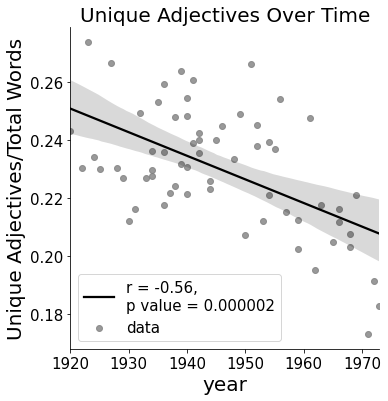

In [20]:
r = pearsonr(df['year_written'], df["%_unique_adj"])[0]
p_value = pearsonr(df['year_written'], df["%_unique_adj"])[1]
sns.lmplot(x="year_written", y="%_unique_adj", data=df,scatter_kws={"color": "gray"}, line_kws={"color": "black"});
plt.xticks(size=15)
plt.yticks(size=15)
plt.legend((f'r = {r:.2f}, \np value = {p_value:.6f}', 'data'), prop={'size': 15})
plt.title('Unique Adjectives Over Time', size=20)
plt.xlabel('year', size = 20)
plt.ylabel('Unique Adjectives/Total Words', size = 20)

Text(0.42499999999999716, 0.5, 'Unique Nouns/Total Words')

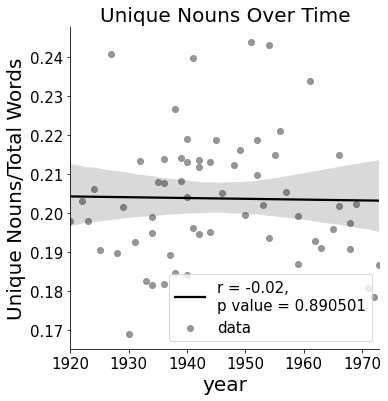

In [21]:
r = pearsonr(df['year_written'], df["%_unique_noun"])[0]
p_value = pearsonr(df['year_written'], df["%_unique_noun"])[1]
sns.lmplot(x="year_written", y="%_unique_noun", data=df,scatter_kws={"color": "gray"}, line_kws={"color": "black"});
plt.xticks(size=15)
plt.yticks(size=15)
plt.legend((f'r = {r:.2f}, \np value = {p_value:.6f}', 'data'), prop={'size': 15})
plt.title('Unique Nouns Over Time', size=20)
plt.xlabel('year', size = 20)
plt.ylabel('Unique Nouns/Total Words', size = 20)

Text(0.42499999999999716, 0.5, '% of Positive Sentences')

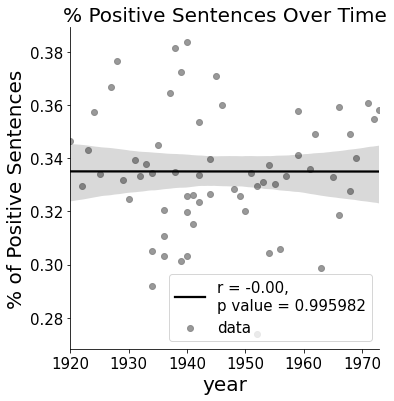

In [22]:
r = pearsonr(df['year_written'], df["%_pos_sentences"])[0]
p_value = pearsonr(df['year_written'], df["%_pos_sentences"])[1]
sns.lmplot(x="year_written", y="%_pos_sentences", data=df,scatter_kws={"color": "gray"}, line_kws={"color": "black"});
plt.xticks(size=15)
plt.yticks(size=15)
plt.legend((f'r = {r:.2f}, \np value = {p_value:.6f}', 'data'), prop={'size': 15})
plt.title('% Positive Sentences Over Time', size=20)
plt.xlabel('year', size = 20)
plt.ylabel('% of Positive Sentences', size = 20)

Text(0.42499999999999716, 0.5, '% of Neutral Sentences')

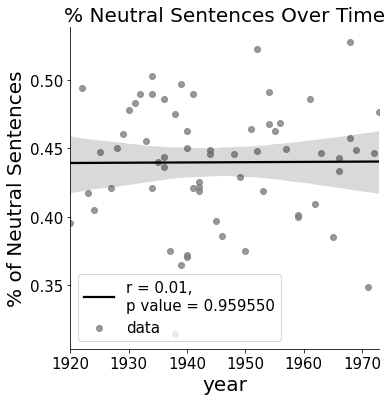

In [23]:
r = pearsonr(df['year_written'], df["%_neu_sentences"])[0]
p_value = pearsonr(df['year_written'], df["%_neu_sentences"])[1]
sns.lmplot(x="year_written", y="%_neu_sentences", data=df,scatter_kws={"color": "gray"}, line_kws={"color": "black"});
plt.xticks(size=15)
plt.yticks(size=15)
plt.legend((f'r = {r:.2f}, \np value = {p_value:.6f}', 'data'), prop={'size': 15})
plt.title('% Positive Sentences Over Time', size=20)
plt.title('% Neutral Sentences Over Time', size=20)
plt.xlabel('year', size = 20)
plt.ylabel('% of Neutral Sentences', size = 20)

Text(0.42499999999999716, 0.5, '% of Negative Sentences')

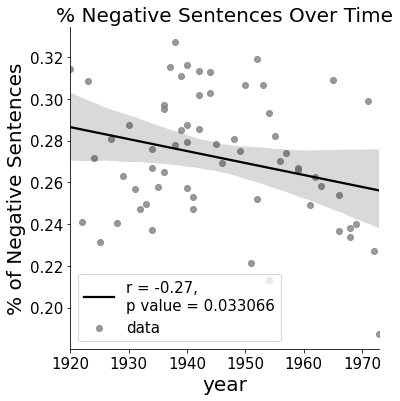

In [24]:
r = pearsonr(df['year_written'], df["%_neg_sentences"])[0]
p_value = pearsonr(df['year_written'], df["%_neg_sentences"])[1]
sns.lmplot(x="year_written", y="%_neg_sentences", data=df,scatter_kws={"color": "gray"}, line_kws={"color": "black"});
plt.xticks(size=15)
plt.yticks(size=15)
plt.legend((f'r = {r:.2f}, \np value = {p_value:.6f}', 'data'), prop={'size': 15})
plt.title('% Negative Sentences Over Time', size=20)
plt.xlabel('year', size = 20)
plt.ylabel('% of Negative Sentences', size = 20)